## 개요 

참여중인 딥러닝 스터디 3주차 기록입니다.

* Softmax로 MNIST다루기
* 강사님이 주신 샘플코드 참고해서, 나에게 맞추거나 추가공부 진행

## 과제 작성 (Softmax / Linear)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

### Mnist Dataset로딩 및 전처리

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
for i in (x_train, y_train, x_test, y_test):
    print(i.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### float변환

In [11]:
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

#### Flatten

In [5]:
# Flatten (num_features=784)
num_features = 784 # 28*28 (Data의 Shape)

print('Flatten전 : ', x_train.shape, x_test.shape)
x_train, x_test = x_train.reshape(-1, num_features), x_test.reshape(-1, num_features)
print('Flatten후 : ', x_train.shape, x_test.shape)

Flatten전 :  (60000, 28, 28) (10000, 28, 28)
Flatten후 :  (60000, 784) (10000, 784)


#### Normalize

In [6]:
# Normalize (0~255사이의 값을 0~1 사이의 값으로)
x_train, x_test = x_train / 255., x_test / 255.

### 함수 및 파라메터 설정

In [7]:
# Parameters
learning_rate = 0.01
training_steps = 1000
batch_size = 256

num_classes = 10 # MNIST의 0~9 숫자 10개
num_features = 784 # 28*28 (Data의 Shape)

# Variables
W = tf.Variable(tf.ones([num_features, num_classes]), name='weight')
b = tf.Variable(tf.zeros([num_classes]), name='bias')

# Functions
def softmax(x):
    z = tf.matmul(x, W) + b
    sm = tf.nn.softmax(z)
    return sm

def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.) # clip_by_value에서 1e-9 최소값지정사유 : 
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1))

* tf.nn.softmax : 0~1 사이로 출력
* tf.one_hot(y_true, depth=num_classes) : y_true인 대상을 depth에 맞춰 원핫인코딩
  ```python
    # 샘플
    tf.one_hot([2], depth=5).numpy()
    >>> array([[0., 0., 1., 0., 0.]], dtype=float32)
  ```
* tf.clip_by_value(y_pred, 1e-9, 1.) : y_pred인 대상을 제시한 min, max에 맞춰 변환
  ```python
    # 샘플
    # 변환 전
    t = tf.constant([[-1, 0, 1], [2, 3, 4]], dtype=tf.float32)
    t.numpy()
    >>> array([[-1.,  0.,  1.],
       [ 2.,  3.,  4.]], dtype=float32)
    # 변환 후
    tf.clip_by_value(t, clip_value_min=0, clip_value_max=2).numpy()
    >>> array([[0., 0., 1.],
       [2., 2., 2.]], dtype=float32)
  ```

In [8]:
# Optimization
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis = 0)

def batch_maker(text, data_row, batch_size):
    random_idx = np.random.randint(data_row, size = batch_size)
    return x_train[random_idx], y_train[random_idx]

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = softmax(x)
        cost = cross_entropy(pred, y)

    gradients = g.gradient(cost, [W, b])

    optimizer.apply_gradients(zip(gradients, [W, b]))

# Optimizer (Stochastic Gradient Descent)
optimizer = tf.optimizers.SGD(learning_rate)

for step in range(training_steps): # training_steps = 1000로 위에서 지정해둠
    batch_x, batch_y = batch_maker('training', 60000, batch_size) # batch_size = 256로 위에서 지정해둠

    run_optimization(batch_x, batch_y)

    if step % 100 == 0:
        pred = softmax(batch_x)
        cost = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print(f"Step : {step} | loss : {cost} / accuracy : {acc}")


Step : 0 | loss : 2.287696123123169 / accuracy : 0.6875
Step : 100 | loss : 1.5578452348709106 / accuracy : 0.7578125
Step : 200 | loss : 1.188745379447937 / accuracy : 0.8359375
Step : 300 | loss : 1.010088324546814 / accuracy : 0.796875
Step : 400 | loss : 0.8610934019088745 / accuracy : 0.859375
Step : 500 | loss : 0.807215690612793 / accuracy : 0.8359375
Step : 600 | loss : 0.7144550085067749 / accuracy : 0.8671875
Step : 700 | loss : 0.7559677362442017 / accuracy : 0.81640625
Step : 800 | loss : 0.6656553745269775 / accuracy : 0.8515625
Step : 900 | loss : 0.59657222032547 / accuracy : 0.8828125


### 학습 후 Validation(Test)

In [9]:
# W와 b가 학습된 model로 Validation(Test Dataset사용)
prediction = softmax(x_test)
print(f"Test accuracy : {accuracy(prediction, y_test)}")

Test accuracy : 0.8716999888420105


### 추가적으로 검증기능 구현해보기

* 추가적으로, 아래의 기능을 구현해보았음
  * number_to_look을 입력하여 원하는 횟수만큼 모델검증
  * randint를 활용하여 랜덤추출, tested_list로 추출내역 관리하여 중복회피
  * pyplot으로 형태/예측/정답을 시각화

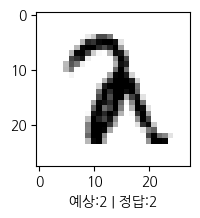

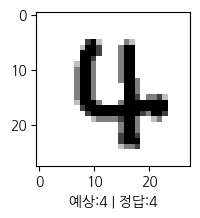

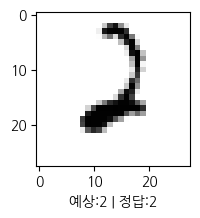

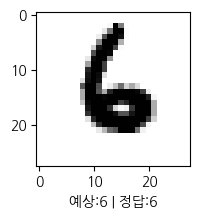

In [ ]:
import koreanize_matplotlib

# 시각화로 Validation 확인
number_to_look = 4
tested_list = []

for i in range(number_to_look):
    plt.figure(figsize=(2,2))
    # 테스트할 데이터 랜덤추출
    idx = -1
    while idx not in tested_list:
        idx = np.random.randint(0, y_test.shape[0])
        tested_list.append(idx)

    # 결과 확인
    plt.xlabel(f"예상:{np.argmax(prediction[idx])} | 정답:{y_test[idx]}")
    plt.imshow(np.reshape(x_test[idx], [28, 28]), cmap=plt.cm.binary)
    plt.show()